In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from epoch_based_evolution import SearchSpace, Generation, run_generation, create_dataloaders
import load_data

# Load Data

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data.get_preprocessed_data(dataset_id=12, scaling=True, random_seed=13, return_as='tensor')
input_size, output_size = load_data.get_tensor_sizes(X_train, y_train)

Class column is not numeric. Applying LabelEncoder.
Data loaded successfully! Format: tensor
Training data shape: torch.Size([1280, 216])


In [3]:
search_space = SearchSpace(
    input_size=input_size,
    output_size=output_size,          
    # min_layers=2,           # Minimum number of hidden layers
    # max_layers=5,           # Maximum number of hidden layers
    # min_neurons=16,         # Minimum neurons per layer
    # max_neurons=256,        # Maximum neurons per layer
    # activation_fns=[nn.ReLU, nn.LeakyReLU],  # Activation functions to sample
    # dropout_rates=[0, 0.1, 0.2],             # Dropout rates to sample
    # min_learning_rate=0.0001,                # Minimum learning rate
    # max_learning_rate=0.01,                  # Maximum learning rate
    # random_seeds=[42, 13, 2024],             # Random seeds for reproducibility
    # min_batch_size=32,                       # Minimum batch size
    # max_batch_size=512                       # Maximum batch size
)


# Build the first generation

# Experiments

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import time

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')

# Use LaTeX-style font rendering
mpl.rcParams.update({
    "text.usetex": True, 
    "font.family": "serif", 
    "font.serif": ["Computer Modern"], 
    "axes.labelsize": 12, 
    "axes.titlesize": 14, 
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

In [6]:
import numpy as np

In [7]:
number_of_epochs = 5
percentile_drop = 25
start_time = time.time()
N_INDIVIDUALS = 500

# Data storage for scatter plot
epoch_list = []
val_acc_list = []
val_loss_list = []

# Dictionary to count models per epoch
model_counts = {}
start_time = time.time()
generation = Generation(search_space, N_INDIVIDUALS)

for n_epoch in range(number_of_epochs):
    print('\n-Epoch:', n_epoch + 1)
    final_gen = run_generation(generation, 
                   X_train, y_train, X_val, y_val, percentile_drop=percentile_drop)
    
    num_models = len(final_gen.generation)
    model_counts[n_epoch] = num_models  # Store model count per epoch

    # Store all models' results
    for model_id in final_gen.generation:
        val_acc_list.append(final_gen.generation[model_id]['val_acc'])
        val_loss_list.append(final_gen.generation[model_id]['val_loss'])
        epoch_list.append(n_epoch)

    print(f"Survivor models: {num_models}")
    print(f"Val_Acc mean: {np.mean([final_gen.generation[gen]['val_acc'] for gen in final_gen.generation])}")
    percentile_drop += 5  # Increase the percentile drop each epoch
final_time = time.time() - start_time
print('Final_time:', final_time)


-Epoch: 1
Survivor models: 375
Val_Acc mean: 0.3810333333333333

-Epoch: 2
Survivor models: 263
Val_Acc mean: 0.6026853612167301

-Epoch: 3
Survivor models: 171
Val_Acc mean: 0.8457967836257311

-Epoch: 4
Survivor models: 103
Val_Acc mean: 0.9256067961165049

-Epoch: 5
Survivor models: 57
Val_Acc mean: 0.9434210526315789
Final_time: 94.67521262168884


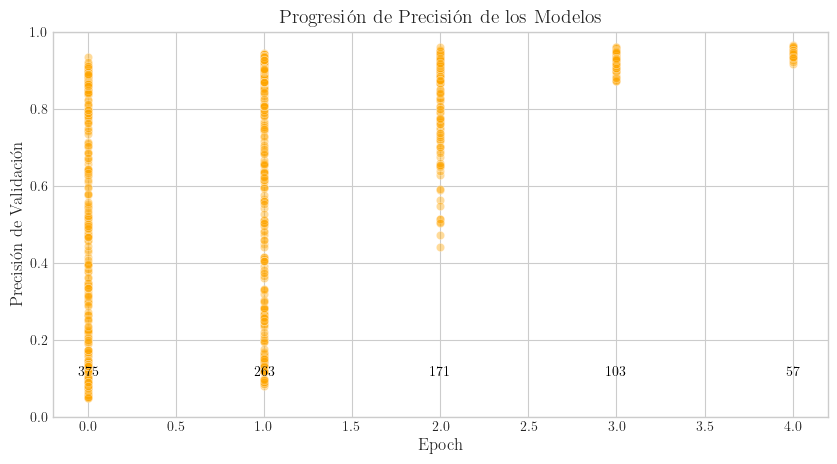

In [8]:

# Scatter plot for Accuracy
plt.figure(figsize=(10, 5))
sns.scatterplot(x=epoch_list, y=val_acc_list, alpha=0.4, edgecolor='white', c='orange')

# Add model count annotations
for epoch, count in model_counts.items():
    plt.text(epoch, 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black', transform=plt.gca().transData)

plt.xlabel('Epoch')
plt.ylabel('Precisión de Validación')
plt.title('Progresión de Precisión de los Modelos')
plt.ylim(0, 1)
plt.show()

In [9]:
import pandas as pd
pd.DataFrame(pd.DataFrame(final_gen.generation).loc['architecture'])


,architecture
0,"{'hidden_layers': [443, 234, 441], 'activation..."
1,"{'hidden_layers': [386, 463], 'activation_fn':..."
2,"{'hidden_layers': [374, 448, 235], 'activation..."
3,"{'hidden_layers': [358, 272, 476], 'activation..."
4,"{'hidden_layers': [32, 74], 'activation_fn': <..."
5,"{'hidden_layers': [240, 17, 353], 'activation_..."
6,"{'hidden_layers': [319, 111, 38], 'activation_..."
7,"{'hidden_layers': [273, 123], 'activation_fn':..."
8,"{'hidden_layers': [169, 331, 211, 120], 'activ..."
9,"{'hidden_layers': [296, 294, 391], 'activation..."


In [10]:
# Extract val_Accuracy values
val_accuracies = [final_gen.generation[gen]['val_acc'] for gen in final_gen.generation]

# Calculate the mean val_loss
mean_val_acc = sum(val_accuracies) / len(val_accuracies)
# Print the mean val_loss
print("Mean val_acc:", mean_val_acc)

Mean val_acc: 0.9434210526315787


<Axes: >

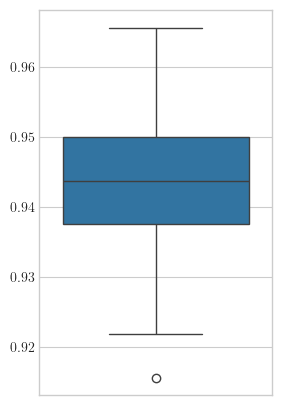

In [11]:
plt.figure(figsize=(3,5))
sns.boxplot(val_accuracies)

In [14]:
final_gen.return_df().columns

Index(['hidden_layers', 'activation_fn', 'dropout_rate', 'optimizer_type',
       'learning_rate', 'batch_size', 'random_seed', 'train_loss', 'train_acc',
       'val_loss', 'val_acc'],
      dtype='object')

In [13]:
final_gen.generation[0].keys()

dict_keys(['model', 'architecture', 'batch_size', 'train_loss', 'train_acc', 'val_loss', 'val_acc'])

In [12]:
final_gen.drop_all_except_best()
final_gen.train_best_individual(X_train, y_train, num_epochs=50)

In [17]:
final_gen.generation[0]['architecture']

{'hidden_layers': [67, 445],
 'activation_fn': torch.nn.modules.activation.ReLU,
 'dropout_rate': 0.1,
 'optimizer_type': torch.optim.adam.Adam,
 'learning_rate': 0.009696123708314377,
 'batch_size': 128,
 'random_seed': 777}

In [15]:
batch_size = final_gen.generation[0]["batch_size"]
val_loader = create_dataloaders(X=X_val, y=y_val, batch_size=batch_size)
test_loader = create_dataloaders(X=X_test, y=y_test, batch_size=batch_size)

val_loss, val_accuracy = final_gen.generation[0]['model'].evaluate(val_loader)
test_loss, test_accuracy = final_gen.generation[0]['model'].evaluate(test_loader)

In [16]:
print('Final Results:')
print(val_loss, val_accuracy)
print(test_loss, test_accuracy)

Final Results:
0.39859727025032043 0.9625
0.131744821369648 0.97
